In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.notebook_config import *
import random

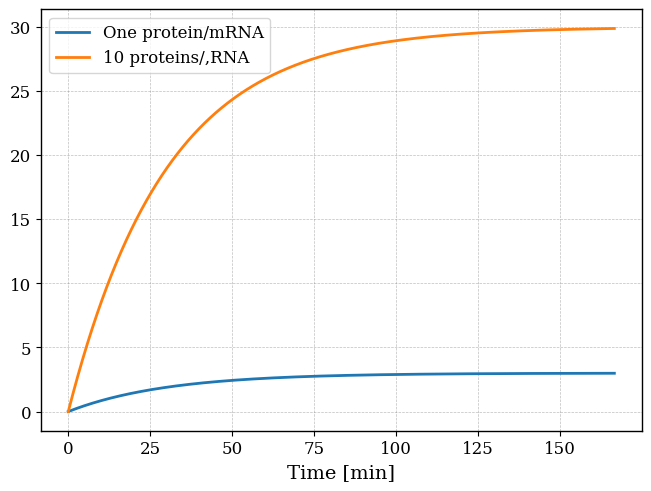

In [2]:
#Task 1

k_p, k_d = 1/600, 1/1800

def N(t, k_p, k_d):
    result = (k_p/k_d)*(1-np.exp(-k_d*t))
    return result

t = np.array([i for i in range(10000)])

proteins = np.array([N(i,k_p,k_d) for i in t])

proteins10 = np.array([N(i,k_p*10,k_d) for i in t])

t = t/60

plt.xlabel("Time [min]")

plt.plot(t, proteins, label="One protein/mRNA")
plt.plot(t, proteins10, label="10 proteins/,RNA")
plt.legend()

Text(0.5, 0, 'Time [min]')

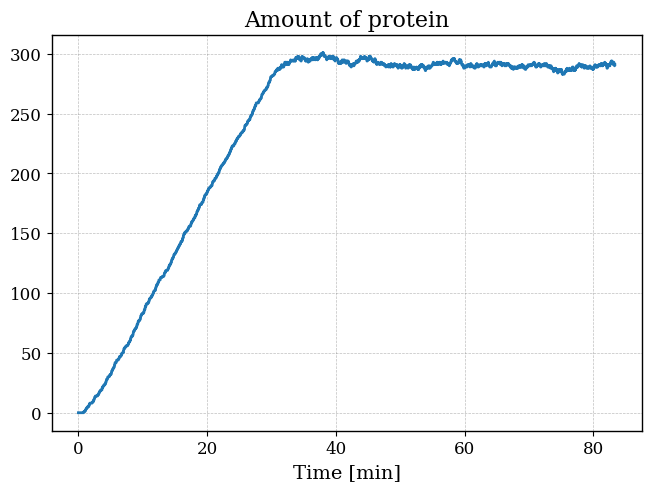

In [23]:
#Task 2

alpha, beta, L = 0.5, 0.5, 30

#codons = "AGCGCGCGGUCACAACGUUACUGUUAUCGAUCCGGUCGAAAAACUGCUGGCAGUGGGGCAUUACCUCGAAUCUACCGUCGAUAUUGCUGA"

q = np.random.rand(30)

def protein(alpha, beta, q, L, timesteps: int):
    p_l = 0
    counter = 0                         #protein counter
    ribo = np.zeros(L)                 #tracks where the ribosomes are, 1 = ribosome, 0 = no ribosome
    production = []                     #amount of protein over time
    age = []            #tracks age of protein
    index = np.array([i for i in range(30)])        #index of each codon
    time = [i for i in range(timesteps)]       #time over which we plot
    for step in range(timesteps):
        age = [i+1 for i in age]
        p = np.random.permutation(len(index))       #make sure that the q_i and index stay together after shuffling
        index, q = index[p], q[p]                   #shuffle the codons randomly
        if ribo[29] == 1:
            p_l += 1
        for i in index:
            if i == 0:                  #Special case 1: the beginning
                if random.random() < alpha:
                    if ribo[0] == 0:
                        ribo[0] += 1
            if i == 29:                 #Special case 2: the end
                if random.random() < beta:
                    if ribo[29] == 1:
                        ribo[29] -= 1
                        counter += 1
                        age.append(0)
            if random.random() < q[i] and i != 29:
                if ribo[i] == 1 and ribo[i+1] == 0:
                    ribo[i+1] += 1
                    ribo[i] -= 1
        dead = [j>1799 for j in age]
        dead = len([i for i in dead if i == True])
        if dead == 1:
            counter -= 1
            age.pop(0)
        production.append(counter)
        if p_l != 0:
            p_l = p_l/timesteps
    return time, production, p_l

def stochastic(alpha, beta, q, L, timesteps, shots: int):
    y_all = np.array([0 for i in range(timesteps)])
    for i in range(shots):
        x,y,_ = protein(alpha, beta, q, L, timesteps)
        y_all = np.vstack((y_all, y))
    y_avg, y_std = [], []
    for i in y_all.T:
        y_avg.append(np.mean(i))
        y_std.append(np.std(i))
    x,_,_ = protein(alpha, beta, q, L, timesteps)
    return x,y_all, y_avg, y_std

x,y,_ = protein(alpha, beta, q, L, 5000)

x = [i/60 for i in x]

plt.plot(x,y)
plt.title("Amount of protein")
plt.xlabel("Time [min]")

In [24]:
x, y_all, y_avg, y_std = stochastic(alpha, beta, q, L, timesteps=5000, shots=100)

Text(0.5, 0, 'Time [min]')

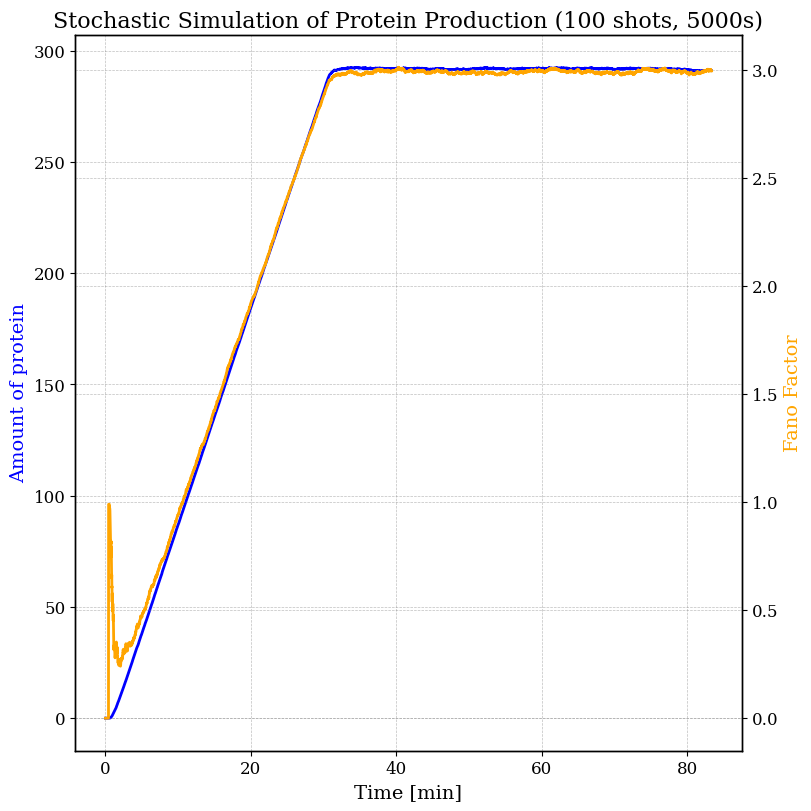

In [25]:
fano = []

for i, val in enumerate(y_avg):
    if val != 0:
        hmm = (y_std[i]**2)/val
    else:
        hmm = 0
    fano.append(hmm)

x = [i/60 for i in x]

fig, ax1 = plt.subplots(figsize=(8, 8))

ax2 = ax1.twinx()

ax1.plot(x, y_avg, color="blue")
ax1.set_ylabel("Amount of protein", color = "blue")
ax2.set_ylabel("Fano Factor", color = "orange")
ax2.plot(x, fano, color="orange")

ax1.set_title("Stochastic Simulation of Protein Production (100 shots, 5000s)")
ax1.set_xlabel("Time [min]")

In [28]:
L = 30

alpharange = np.linspace(0,1,20)

beta1, beta2 = 0.25, 0.5

q = np.array([1 for i in range(30)])

y1, y2 = [],[]

shots = 30

for k in alpharange:
    p_l_avg = 0
    for j in range(shots):
        x,y,p_l = protein(k, beta1, q, L, 3000)
        p_l_avg += p_l
    p_l_avg = p_l_avg/shots
    y1.append(beta1*p_l_avg)
    p_l_avg = 0
    for j in range(shots):
        x,y,p_l = protein(k, beta2, q, L, 3000)
        p_l_avg += p_l
    p_l_avg = p_l_avg/shots
    y2.append(beta2*p_l_avg)

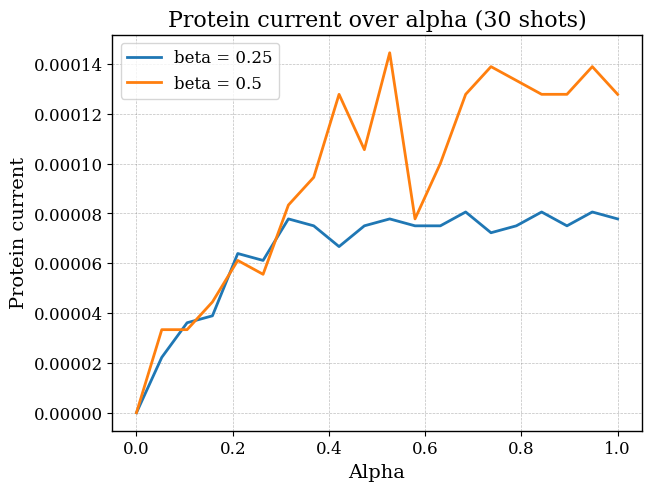

In [29]:
plt.plot(alpharange, y1, label="beta = 0.25")
plt.plot(alpharange, y2, label="beta = 0.5")

plt.xlabel("Alpha")
plt.ylabel("Protein current")
plt.title("Protein current over alpha (30 shots)")
plt.legend()
plt.show()